#### The Lomb-Scargle Periodogram is designed to detect periodic signals in unevenly-spaced observations.

In [5]:
import numpy as np
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)

#### These are 100 noisy measurements taken at irregular times, with a frequency of 1 cycle per unit time. The Lomb-Scargle periodogram can be computed as follows:

In [6]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(t, y).autopower()

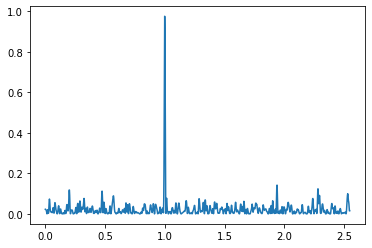

In [8]:
import matplotlib.pyplot as plt
plt.plot(frequency, power)
plt.show()

### Measurement Uncertainties

In [9]:
# If all uncertainties are the same
dy = 0.1
frequency, power = LombScargle(t, y, dy).autopower()

In [10]:
# If uncertainties vary from observation to observation
dy = 0.1 * (1 + rand.rand(100))
y = np.sin(2 * np.pi * t) + dy * rand.randn(100)
frequency, power = LombScargle(t, y, dy).autopower()

### Periodograms and Units
The periodogram of an unequally-spaced time series is generally sensitive to periods far smaller than the minimum time between observations.

In [12]:
import astropy.units as u
t_days = t * u.day
y_mags = y * u.mag
dy_mags = y * u.mag
frequency, power = LombScargle(t_days, y_mags, dy_mags).autopower()
frequency.unit, power.unit

(Unit("1 / d"), Unit(dimensionless))

### Specifying the Frequency

In [13]:
frequency, power = LombScargle(t, y, dy).autopower(nyquist_factor=2)
len(frequency), frequency.min(), frequency.max()

(500, 0.0010189890448009111, 1.0179700557561102)

In [14]:
frequency, power = LombScargle(t, y, dy).autopower(nyquist_factor=10)
len(frequency), frequency.min(), frequency.max()

(2500, 0.0010189890448009111, 5.0939262349597545)

In [15]:
frequency = np.linspace(0.5, 1.5, 1000)
power = LombScargle(t, y, dy).power(frequency)

#### Fastest Lomb-Scargle implementation requires regularly-spaced frequencies. If frequencies are irregularly-spaced, a slower method will be used instead.

### Frequency Grid Spacing

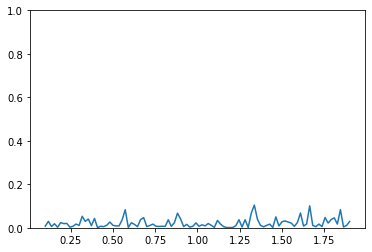

In [21]:
frequency = np.linspace(0.1, 1.9, 100)
power = LombScargle(t, y, dy).power(frequency)
plt.plot(frequency,power)
plt.ylim(0.0, 1.0)
plt.show()

884


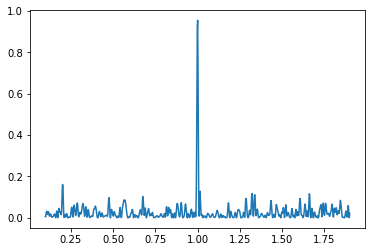

In [24]:
%matplotlib inline
frequency, power = LombScargle(t, y, dy).autopower(minimum_frequency=0.1, maximum_frequency=1.9)
print(len(frequency))
plt.plot(frequency, power)
plt.show()

1767


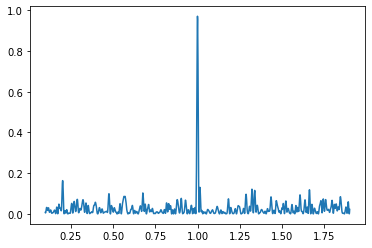

In [25]:
%matplotlib inline
frequency, power = LombScargle(t, y, dy).autopower(minimum_frequency=0.1, maximum_frequency=1.9, samples_per_peak=10)
print(len(frequency))
plt.plot(frequency, power)
plt.show()

### The Lomb-Scargle Model

In [28]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
ls = LombScargle(t, y, dy)
y_fit = ls.model(t_fit, best_frequency)

In [29]:
theta = ls.model_parameters(best_frequency)
theta.round(2)

array([-0.02,  1.05,  0.07])

In [30]:
offset = ls.offset()
design_matrix = ls.design_matrix(best_frequency, t_fit)
np.allclose(y_fit, offset + design_matrix.dot(theta))

True

### Additional Arguments
- center_data controls whether the y values are pre-centered before the algorithm fits the data.
- fit_mean controls whether the model fits for the mean of the data, rather than assuming the mean is zero.
- nterms controls how many Fourier terms are used in the model.